In [2]:
import pandas as pd

df = pd.read_csv("/content/dreaddit_StressAnalysis - Sheet1.csv")

columns = df.columns.tolist()

print(columns)

['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label', 'confidence', 'social_timestamp', 'social_karma', 'syntax_ari', 'lex_liwc_WC', 'lex_liwc_Analytic', 'lex_liwc_Clout', 'lex_liwc_Authentic', 'lex_liwc_Tone', 'lex_liwc_WPS', 'lex_liwc_Sixltr', 'lex_liwc_Dic', 'lex_liwc_function', 'lex_liwc_pronoun', 'lex_liwc_ppron', 'lex_liwc_i', 'lex_liwc_we', 'lex_liwc_you', 'lex_liwc_shehe', 'lex_liwc_they', 'lex_liwc_ipron', 'lex_liwc_article', 'lex_liwc_prep', 'lex_liwc_auxverb', 'lex_liwc_adverb', 'lex_liwc_conj', 'lex_liwc_negate', 'lex_liwc_verb', 'lex_liwc_adj', 'lex_liwc_compare', 'lex_liwc_interrog', 'lex_liwc_number', 'lex_liwc_quant', 'lex_liwc_affect', 'lex_liwc_posemo', 'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_anger', 'lex_liwc_sad', 'lex_liwc_social', 'lex_liwc_family', 'lex_liwc_friend', 'lex_liwc_female', 'lex_liwc_male', 'lex_liwc_cogproc', 'lex_liwc_insight', 'lex_liwc_cause', 'lex_liwc_discrep', 'lex_liwc_tentat', 'lex_liwc_certain', 'lex_liwc_differ', 'lex_liwc_

In [3]:
import numpy as np
nan_rows = df[df.isna().any(axis=1)]

print(nan_rows)

Empty DataFrame
Columns: [id, subreddit, post_id, sentence_range, text, label, confidence, social_timestamp, social_karma, syntax_ari, lex_liwc_WC, lex_liwc_Analytic, lex_liwc_Clout, lex_liwc_Authentic, lex_liwc_Tone, lex_liwc_WPS, lex_liwc_Sixltr, lex_liwc_Dic, lex_liwc_function, lex_liwc_pronoun, lex_liwc_ppron, lex_liwc_i, lex_liwc_we, lex_liwc_you, lex_liwc_shehe, lex_liwc_they, lex_liwc_ipron, lex_liwc_article, lex_liwc_prep, lex_liwc_auxverb, lex_liwc_adverb, lex_liwc_conj, lex_liwc_negate, lex_liwc_verb, lex_liwc_adj, lex_liwc_compare, lex_liwc_interrog, lex_liwc_number, lex_liwc_quant, lex_liwc_affect, lex_liwc_posemo, lex_liwc_negemo, lex_liwc_anx, lex_liwc_anger, lex_liwc_sad, lex_liwc_social, lex_liwc_family, lex_liwc_friend, lex_liwc_female, lex_liwc_male, lex_liwc_cogproc, lex_liwc_insight, lex_liwc_cause, lex_liwc_discrep, lex_liwc_tentat, lex_liwc_certain, lex_liwc_differ, lex_liwc_percept, lex_liwc_see, lex_liwc_hear, lex_liwc_feel, lex_liwc_bio, lex_liwc_body, lex_liwc

no null values

In [4]:
df = df.drop(columns=['id'])

In [6]:
print(df.dtypes.tolist())

[dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype

In [7]:
import pandas as pd
from scipy.stats import f_oneway

# Group numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
anova_results = {}

# ANOVA for each numeric column grouped by subreddit
for col in numeric_cols:
    groups = [group[col].dropna() for name, group in df.groupby('subreddit')]
    if len(groups) > 1 and all(len(g) > 1 for g in groups):  # Ensure valid groups
        stat, p = f_oneway(*groups)
        anova_results[col] = p

# Sort by p-value (lowest first)
sorted_anova = sorted(anova_results.items(), key=lambda x: x[1])

# Show top 20 important features based on ANOVA
for feature, p in sorted_anova[:20]:
    print(f"{feature}: p-value = {p:.5e}")

social_upvote_ratio: p-value = 4.98125e-39
lex_liwc_shehe: p-value = 3.95773e-37
lex_liwc_social: p-value = 7.06360e-32
lex_liwc_money: p-value = 6.38837e-26
lex_liwc_ppron: p-value = 1.04865e-21
lex_liwc_male: p-value = 1.44839e-19
lex_liwc_female: p-value = 4.22661e-18
lex_liwc_affiliation: p-value = 4.49901e-18
lex_liwc_anx: p-value = 2.24067e-17
lex_liwc_pronoun: p-value = 5.20617e-15
social_num_comments: p-value = 5.71452e-15
lex_liwc_Clout: p-value = 3.29654e-14
lex_liwc_negemo: p-value = 1.25850e-13
lex_liwc_Dic: p-value = 1.50519e-12
lex_liwc_Authentic: p-value = 9.61192e-11
lex_liwc_anger: p-value = 1.27294e-10
lex_liwc_work: p-value = 1.50897e-10
lex_liwc_Tone: p-value = 2.57812e-10
lex_liwc_family: p-value = 8.71933e-09
lex_liwc_we: p-value = 1.66838e-08


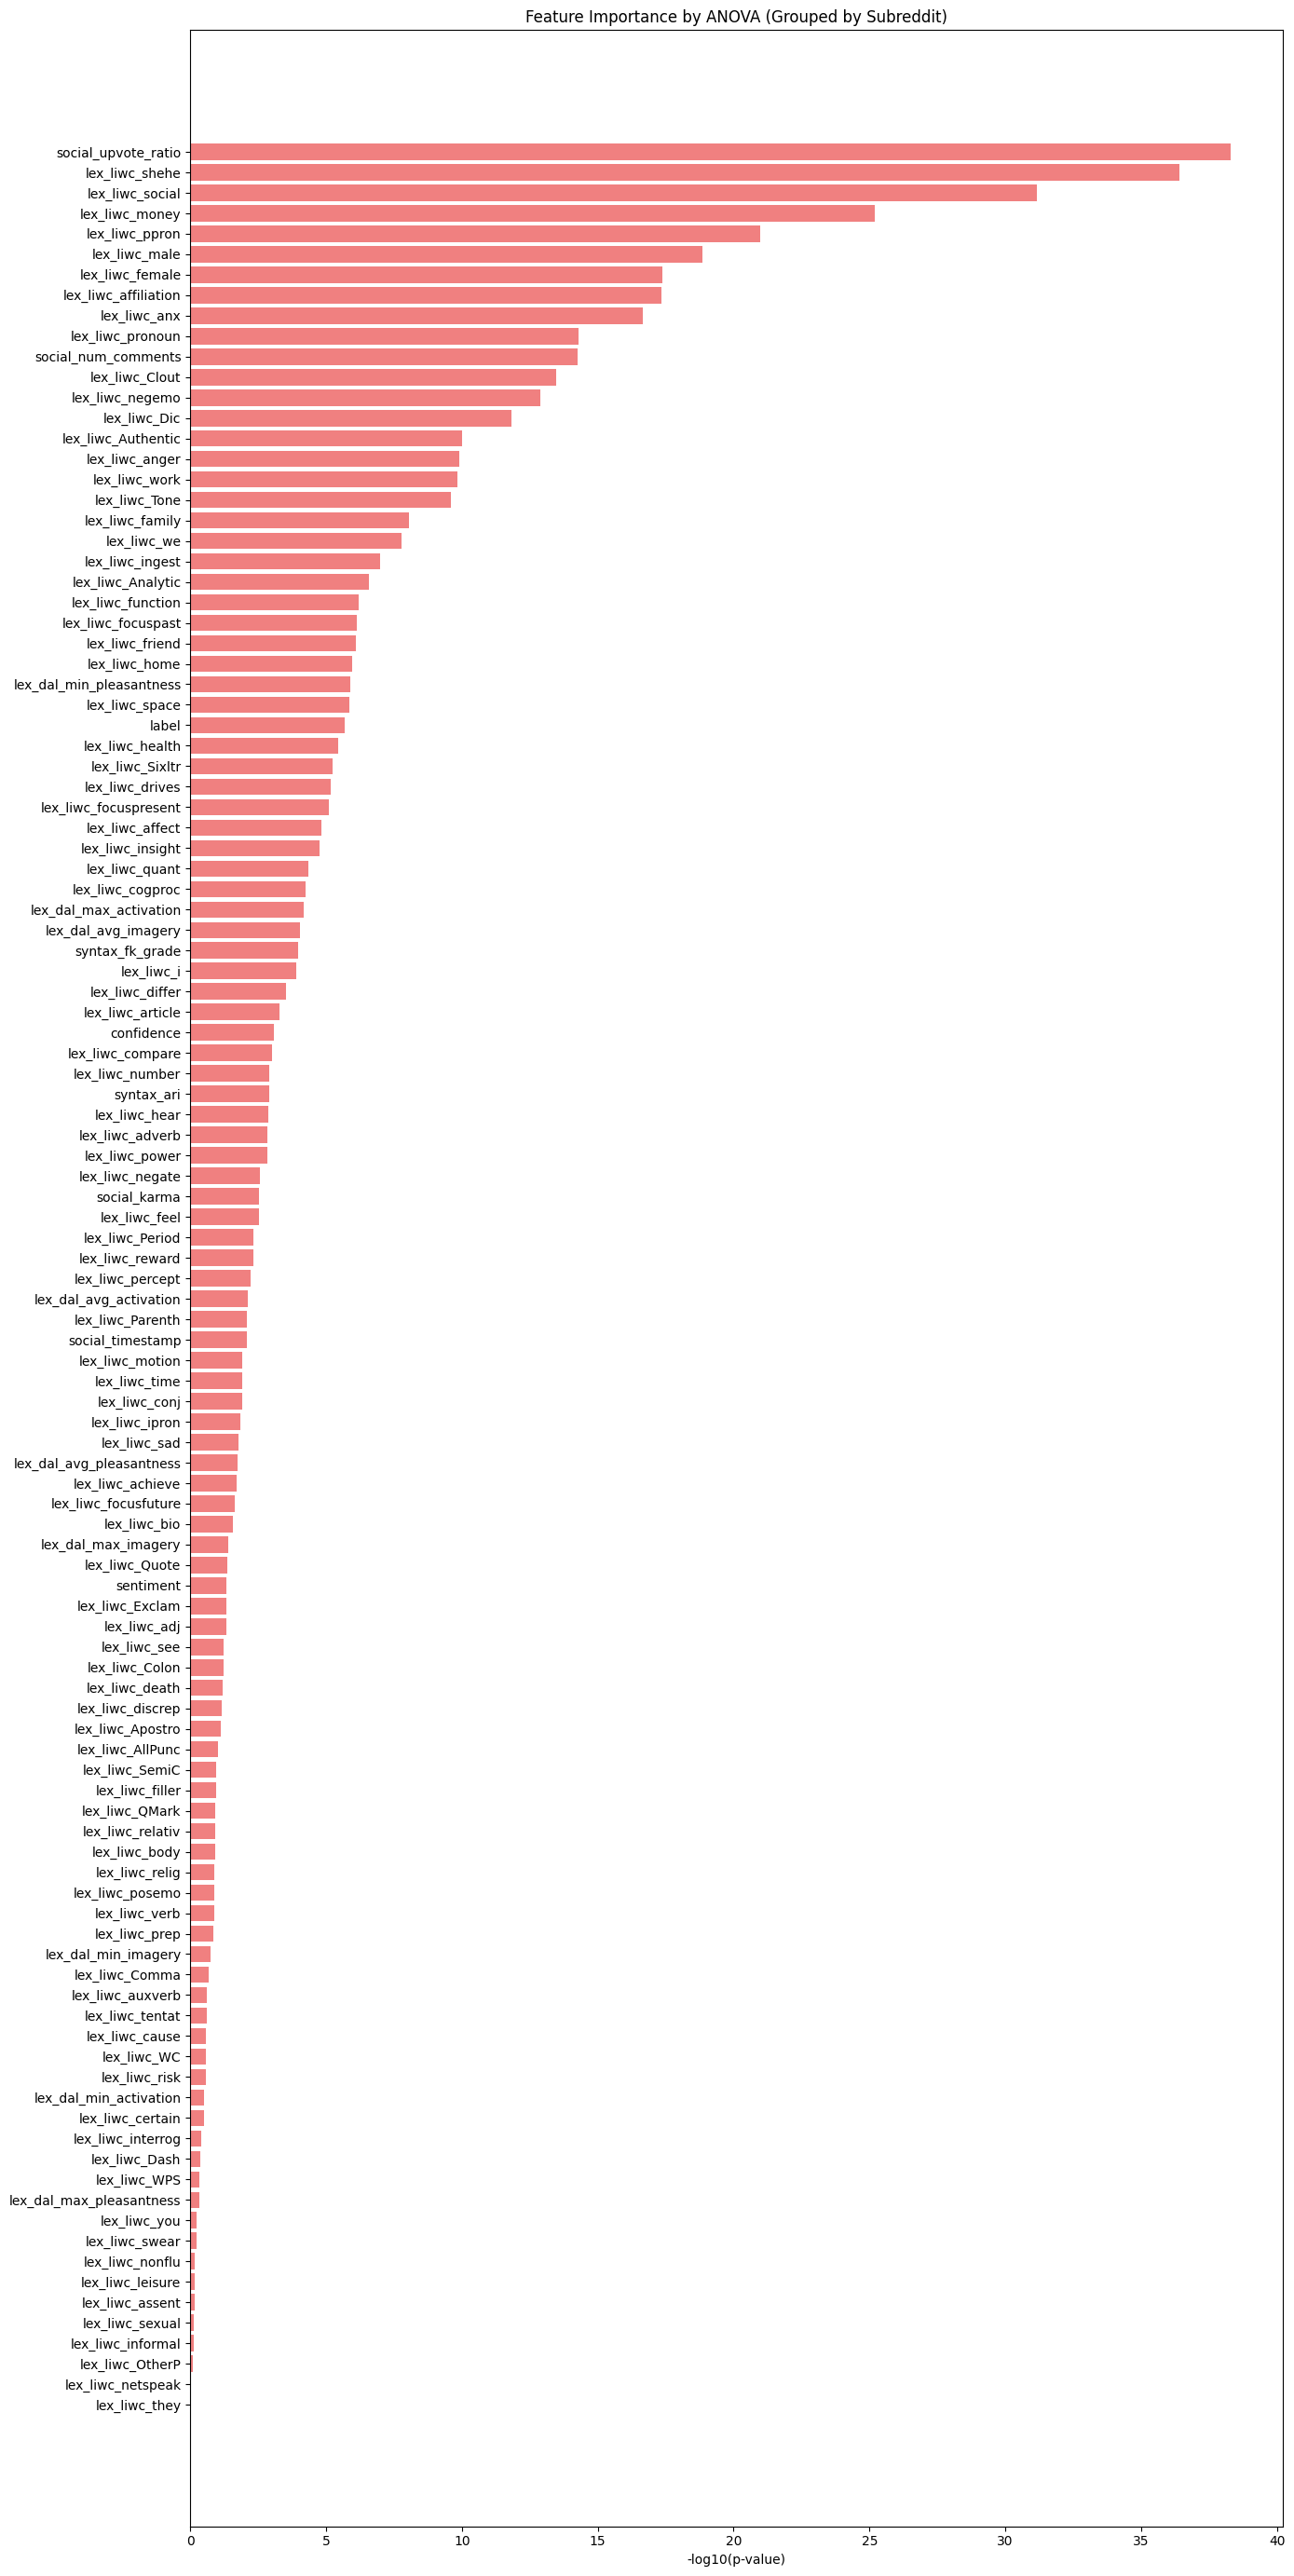

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you've already computed sorted_anova as shown:
# sorted_anova = sorted(anova_results.items(), key=lambda x: x[1])

# Extract feature names and p-values
features = [item[0] for item in sorted_anova]
neg_log_p = [-np.log10(item[1]) for item in sorted_anova]

# Plot all features
plt.figure(figsize=(14, max(6, len(features) * 0.25)))
bars = plt.barh(features, neg_log_p, color='lightcoral')
plt.xlabel('-log10(p-value)')
plt.title('Feature Importance by ANOVA (Grouped by Subreddit)')
plt.gca().invert_yaxis()  # Show most important features on top

# Optional: Annotate with values (only if number of features is manageable)
if len(features) <= 50:
    for bar, p in zip(bars, neg_log_p):
        plt.text(bar.get_width() + 0.3, bar.get_y() + 0.25, f'{p:.2f}', va='center')

plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
from scipy.stats import f_oneway

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
anova_results = {}

# Perform ANOVA for each numeric column grouped by subreddit
for col in numeric_cols:
    groups = [group[col].dropna() for name, group in df.groupby('subreddit')]
    if len(groups) > 1 and all(len(g) > 1 for g in groups):  # Ensure valid groups
        stat, p = f_oneway(*groups)
        anova_results[col] = p

# Convert results to a DataFrame
anova_df = pd.DataFrame(anova_results.items(), columns=['feature', 'p_value'])

# Filter out features with p-value > 0.05 (not statistically significant)
insignificant_features = anova_df[anova_df['p_value'] > 0.05]['feature'].tolist()

# Drop insignificant features from the DataFrame
df_filtered = df.drop(columns=insignificant_features)

print("Removed features due to high p-value (> 0.05):")
print(insignificant_features)

Removed features due to high p-value (> 0.05):
['lex_liwc_WC', 'lex_liwc_WPS', 'lex_liwc_you', 'lex_liwc_they', 'lex_liwc_prep', 'lex_liwc_auxverb', 'lex_liwc_verb', 'lex_liwc_interrog', 'lex_liwc_posemo', 'lex_liwc_cause', 'lex_liwc_discrep', 'lex_liwc_tentat', 'lex_liwc_certain', 'lex_liwc_see', 'lex_liwc_body', 'lex_liwc_sexual', 'lex_liwc_risk', 'lex_liwc_relativ', 'lex_liwc_leisure', 'lex_liwc_relig', 'lex_liwc_death', 'lex_liwc_informal', 'lex_liwc_swear', 'lex_liwc_netspeak', 'lex_liwc_assent', 'lex_liwc_nonflu', 'lex_liwc_filler', 'lex_liwc_AllPunc', 'lex_liwc_Comma', 'lex_liwc_Colon', 'lex_liwc_SemiC', 'lex_liwc_QMark', 'lex_liwc_Dash', 'lex_liwc_Apostro', 'lex_liwc_OtherP', 'lex_dal_max_pleasantness', 'lex_dal_min_activation', 'lex_dal_min_imagery']


In [10]:
df1 = pd.read_csv("/content/dreaddit_StressAnalysis - Sheet1.csv")
df_filtered['id'] = df1['id']


In [11]:
df_filtered.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_Analytic,...,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,id
0,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1514980773,22,-1.238793,2.82,...,2.6,1.0000,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000,896
1,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1493348050,5,7.684583,64.56,...,3.0,1.4000,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909,19059
2,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1524516630,10,2.360408,14.79,...,3.0,1.1429,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818,7977
3,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1524018289,5,5.997000,32.13,...,2.8,1.0000,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667,1214
4,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1516200171,138,4.649418,4.96,...,3.0,1.1250,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667,1965


In [12]:
df_filtered_path = '/content/df_filtered.csv'
df_filtered.to_csv(df_filtered_path, index=False)

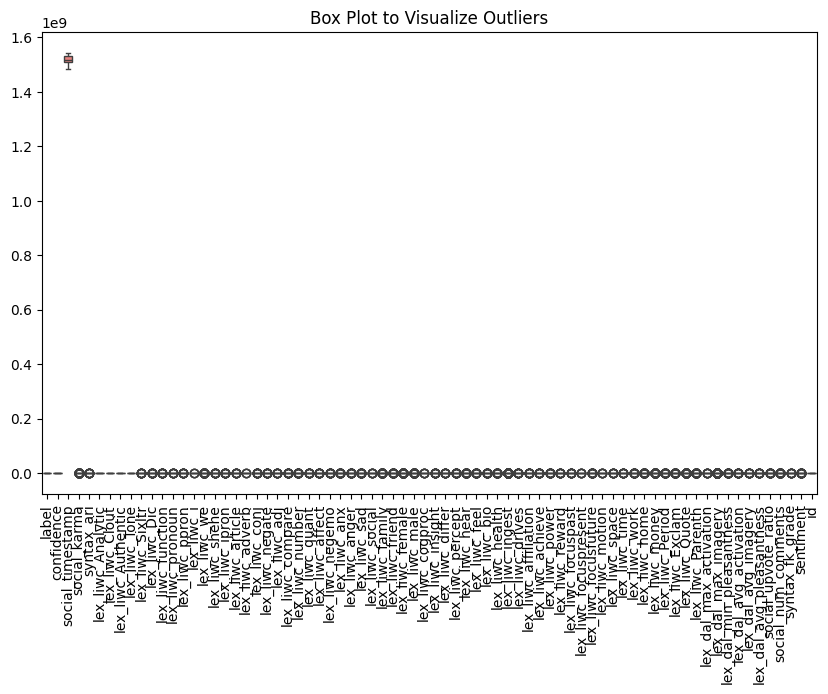

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered is already loaded
# Check the first few rows of df_filtered
df_filtered.head()

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create box plots for each numerical column to visualize outliers
sns.boxplot(data=df_filtered)

# Show the plot
plt.title("Box Plot to Visualize Outliers")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if there are many columns
plt.show()
